# Velocities
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 12/19/2022          |
| Updated | 12/19/2022          |

## **Figure 7.** (Gas)

Case	 Π	ux_0	<ux>	σ_ux	σ_uz
		(Πc_s)	(Πc_s)	(Πc_s)	(Πc_s)
 (1)	(2)	(3)	(4)	(5)	(6)
AB	0.01	0.05	0.11	0.23	0.17
AB	0.02	0.05	0.11	0.22	0.15
AB	0.05	0.05	0.11	0.21	0.15
AB	0.1	0.05	0.11	0.22	0.15
BA	0.01	0.16	0.07	0.21	1.17
BA	0.02	0.16	0.09	0.20	1.29
BA	0.05	0.16	0.11	0.21	0.77
BA	0.1	0.16	0.13	0.25	0.63


/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


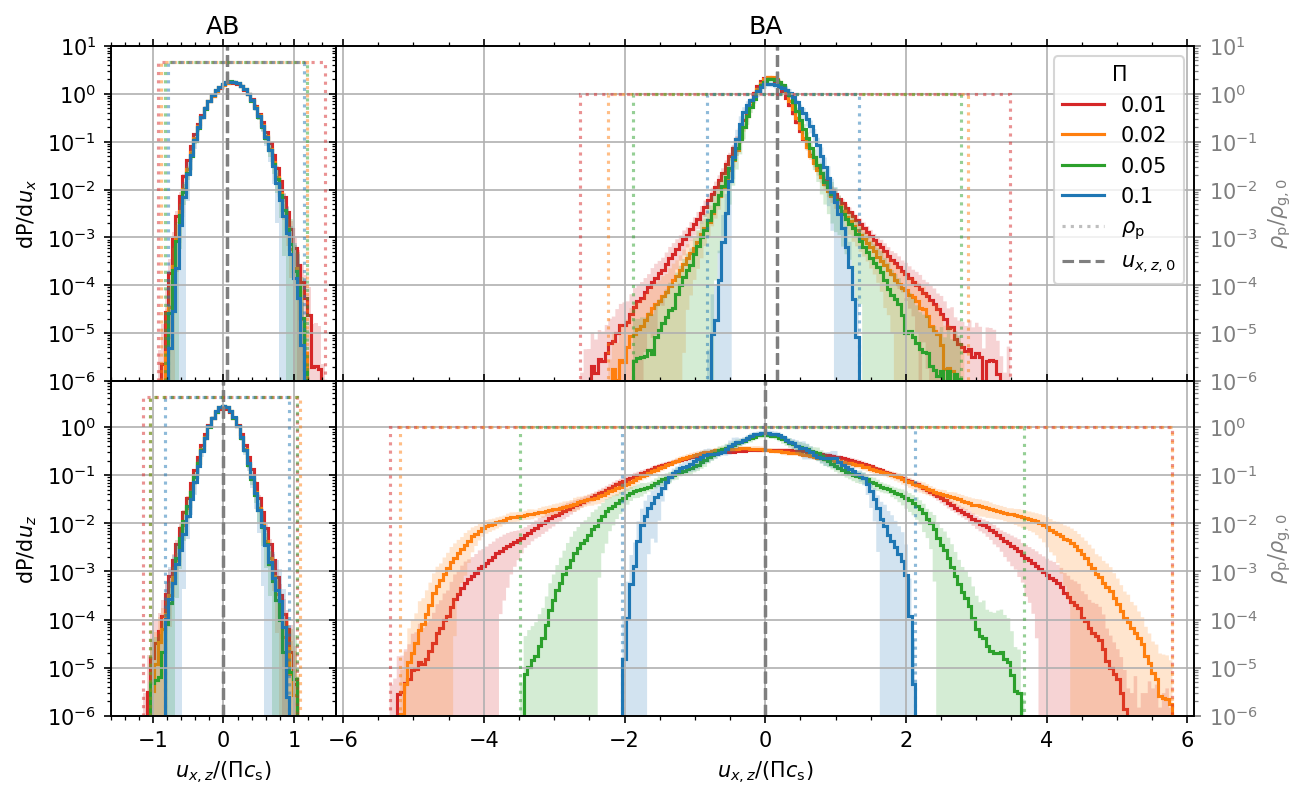

In [100]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(9.32, 5.8),#7.61),
                        height_ratios=[1, 1], width_ratios=[1, 3.81], dpi=150)
twin_axs = [[axs[0][0].twinx(), axs[0][1].twinx()],
            [axs[1][0].twinx(), axs[1][1].twinx()]]
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:red'], ['0.02', 'tab:orange'],
       ['0.05', 'tab:green'], ['0.10', 'tab:blue']]
res = 2048

print(f'Case\t Π\tux_0\t<ux>\tσ_ux\tσ_uz')
print(f'\t\t(Πc_s)\t(Πc_s)\t(Πc_s)\t(Πc_s)')
print(f' (1)\t(2)\t(3)\t(4)\t(5)\t(6)')
for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect parameters
        path = f'{workdir}/{case}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        c_s = athinput['hydro']['iso_sound_speed']

        # Load velocity results
        ux0 = hst['1-mom'][0]/hst['mass'][0]/float(Pi[0])/c_s
        uz0 = hst['2-mom'][0]/hst['mass'][0]/float(Pi[0])/c_s
        npz = np.load(f'{path}/npz/velocities.npz')
        bin_edges = npz['bin_edges']
        avg_uxs, avg_uzs = npz['avg_uxs'], npz['avg_uzs']
        std_uxs, std_uzs = npz['std_uxs'], npz['std_uzs']
        bin_avg_uxs, bin_avg_uzs = npz['bin_avg_uxs'], npz['bin_avg_uzs']
        bin_std_uxs, bin_std_uzs = npz['bin_std_uxs'], npz['bin_std_uzs']
        bin_high_uxs = bin_avg_uxs + bin_std_uxs
        bin_low_uxs  = bin_avg_uxs - bin_std_uxs
        bin_high_uzs = bin_avg_uzs + bin_std_uzs
        bin_low_uzs  = bin_avg_uzs - bin_std_uzs
        # bin_log_std_uxs = npz['bin_log_std_uxs']
        # bin_log_std_uzs = npz['bin_log_std_uzs']
        # bin_high_uxs = bin_avg_uxs*bin_log_std_uxs
        # bin_low_uxs  = bin_avg_uxs/bin_log_std_uxs
        # bin_high_uzs = bin_avg_uzs*bin_log_std_uzs
        # bin_low_uzs  = bin_avg_uzs/bin_log_std_uzs
        print(f'{case}\t{float(Pi[0])}\t{ux0:.2f}\t{avg_uxs:.2f}\t{std_uxs:.2f}\t{std_uzs:.2f}')

        # Load density results
        bin_avg_rhoxs = npz['bin_avg_rhoxs']
        bin_avg_rhozs = npz['bin_avg_rhozs']
        bin_std_rhoxs = npz['bin_std_rhoxs']
        bin_std_rhozs = npz['bin_std_rhozs']
        bin_high_rhoxs = bin_avg_rhoxs + bin_std_rhoxs
        bin_low_rhoxs = bin_avg_rhoxs - bin_std_rhoxs
        bin_high_rhozs = bin_avg_rhozs + bin_std_rhozs
        bin_low_rhozs = bin_avg_rhozs - bin_std_rhozs

        # Plot histograms, equilibrium velocities
        twin_axs[0][i].stairs(bin_avg_rhoxs, bin_edges, color=Pi[1],
                              lw=1.5, ls=':', alpha=0.5)
        # if Pi[0] == '0.01':
        #     axs[0][i].stairs(bin_high_rhoxs, bin_edges,
        #                     baseline=bin_low_rhoxs, fill=True, color=Pi[1],
        #                     alpha=0.1)
        #     axs[1][i].stairs(bin_high_rhozs, bin_edges,
        #                     baseline=bin_low_rhozs, fill=True, color=Pi[1],
        #                     alpha=0.1)
        twin_axs[1][i].stairs(bin_avg_rhozs, bin_edges, color=Pi[1],
                                lw=1.5, ls=':', alpha=0.5)
        axs[0][i].stairs(bin_avg_uxs, bin_edges, color=Pi[1], lw=1.5,
                         label=float(Pi[0]))
        axs[0][i].stairs(bin_high_uxs, bin_edges, baseline=bin_low_uxs,
                         fill=True, color=Pi[1], alpha=0.2)
        axs[0][i].axvline(ux0, c='tab:gray', ls='dashed')
        axs[1][i].stairs(bin_avg_uzs, bin_edges, color=Pi[1], lw=1.5)
        axs[1][i].stairs(bin_high_uzs, bin_edges, baseline=bin_low_uzs,
                         fill=True, color=Pi[1], alpha=0.2)
        axs[1][i].axvline(uz0, c='tab:gray', ls='dashed')

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True)

for ax in np.asarray(twin_axs).flat:
    ax.minorticks_on()
    ax.tick_params(axis='y', which='both', color='tab:gray',
                   labelcolor='tab:gray')

ABylim = (1e-6, 1e1)
BAylim = (1e-6, 9e0)
axs[0][0].set(title='AB', ylabel=r'$\mathrm{dP}/\mathrm{d}u_x$', yscale='log',
              ylim=ABylim)
axs[0][1].plot([], [], color='tab:gray', ls=':', label=r'$\rho_\mathrm{p}$',
               alpha=0.5)
axs[0][1].plot([], [], color='tab:gray', ls='dashed', label=r'$u_{x,z,0}$')
axs[0][1].legend(loc='upper right', title=r'$\Pi$')
axs[0][1].set(title='BA')
axs[1][0].set(xlabel=r'$u_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-1.6, 1.6),
              ylabel=r'$\mathrm{dP}/\mathrm{d}u_z$', yscale='log', ylim=BAylim)
axs[1][1].set(xlabel=r'$u_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-6.1, 6.1))
twin_axs[0][0].yaxis.set_major_locator(ticker.NullLocator())
twin_axs[1][0].yaxis.set_major_locator(ticker.NullLocator())
twin_axs[0][1].set(ylim=ABylim, yscale='log')
twin_axs[1][1].set(ylim=BAylim, yscale='log')
twin_axs[0][1].set_ylabel(r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$', alpha=0.5)
twin_axs[1][1].set_ylabel(r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$', alpha=0.5)
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig(f'figs/gas_velocities.pdf', bbox_inches='tight', pad_inches=0.01)

## **Figure 9.** (Dust)

Case	 Π	vx_0	<vx>	σ_vx	σ_vz
		(Πc_s)	(Πc_s)	(Πc_s)	(Πc_s)
 (1)	(2)	(7)	(8)	(9)	(10)
AB	0.01	-0.05	-0.11	0.18	0.15
AB	0.02	-0.05	-0.11	0.18	0.14
AB	0.05	-0.05	-0.11	0.17	0.13
AB	0.1	-0.05	-0.11	0.17	0.13
BA	0.01	-0.82	-0.33	0.36	1.47
BA	0.02	-0.82	-0.47	0.37	1.84
BA	0.05	-0.82	-0.57	0.35	1.01
BA	0.1	-0.82	-0.64	0.35	0.63


/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


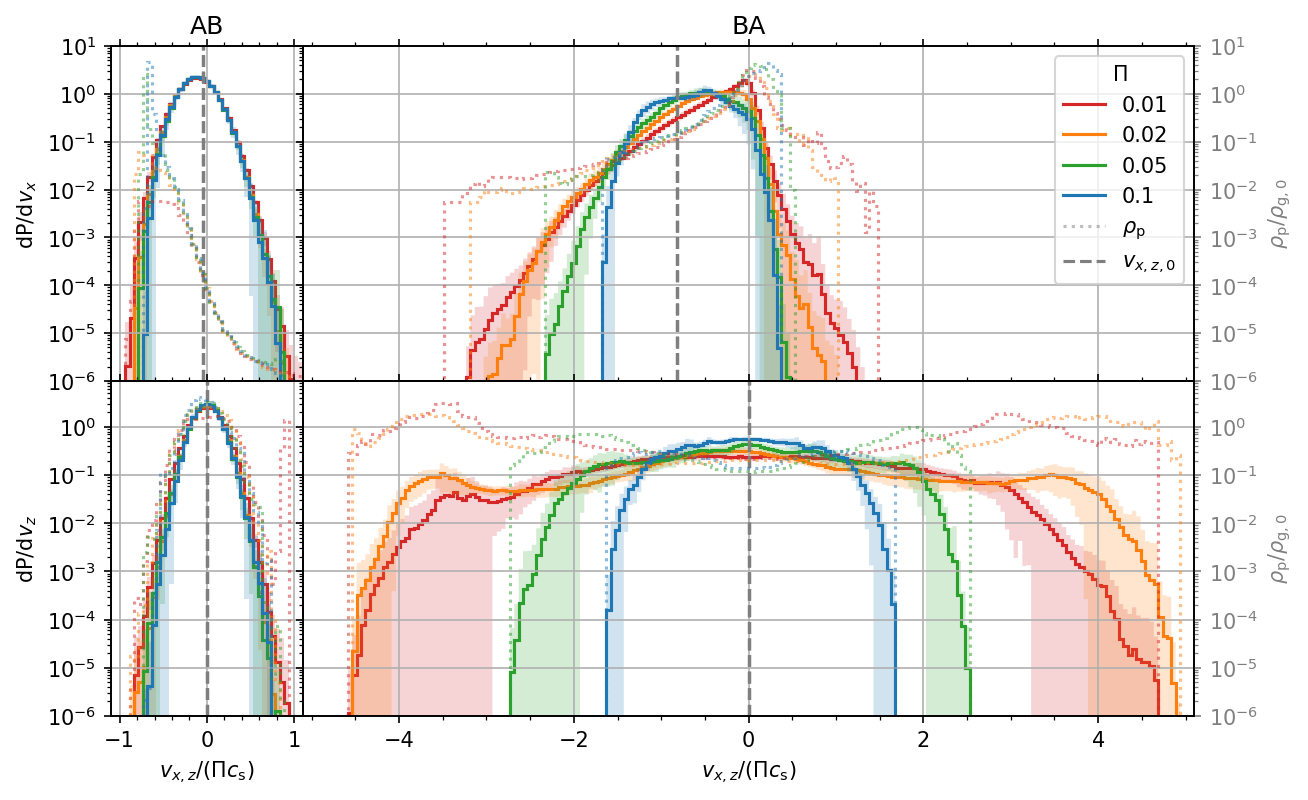

In [112]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(9.32, 5.8),#7.61),
                        height_ratios=[1, 1], width_ratios=[1, 4.64], dpi=150)
twin_axs = [[axs[0][0].twinx(), axs[0][1].twinx()],
            [axs[1][0].twinx(), axs[1][1].twinx()]]
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:red'], ['0.02', 'tab:orange'],
       ['0.05', 'tab:green'], ['0.10', 'tab:blue']]
res = 2048

print(f'Case\t Π\tvx_0\t<vx>\tσ_vx\tσ_vz')
print(f'\t\t(Πc_s)\t(Πc_s)\t(Πc_s)\t(Πc_s)')
print(f' (1)\t(2)\t(7)\t(8)\t(9)\t(10)')
for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect parameters
        path = f'{workdir}/{case}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        c_s = athinput['hydro']['iso_sound_speed']
        Np = athinput['problem']['npx1']*athinput['problem']['npx2']\
             *athinput['problem']['npx3']
        epsilon = athinput['problem']['epsilon']

        # Load velocity results
        vx0 = hst['vp1'][0]/Np/float(Pi[0])/c_s
        vz0 = hst['vp2'][0]/Np/float(Pi[0])/c_s
        npz = np.load(f'{path}/npz/velocities.npz')
        bin_edges = npz['bin_edges']
        avg_vxs, avg_vzs = npz['avg_vxs'], npz['avg_vzs']
        std_vxs, std_vzs = npz['std_vxs'], npz['std_vzs']
        bin_avg_vxs, bin_avg_vzs = npz['bin_avg_vxs'], npz['bin_avg_vzs']
        bin_std_vxs, bin_std_vzs = npz['bin_std_vxs'], npz['bin_std_vzs']
        bin_high_vxs = bin_avg_vxs + bin_std_vxs
        bin_low_vxs  = bin_avg_vxs - bin_std_vxs
        bin_high_vzs = bin_avg_vzs + bin_std_vzs
        bin_low_vzs  = bin_avg_vzs - bin_std_vzs
        # bin_log_std_vxs = npz['bin_log_std_vxs']
        # bin_log_std_vzs = npz['bin_log_std_vzs']
        # bin_high_vxs = bin_avg_vxs*bin_log_std_vxs
        # bin_low_vxs  = bin_avg_vxs/bin_log_std_vxs
        # bin_high_vzs = bin_avg_vzs*bin_log_std_vzs
        # bin_low_vzs  = bin_avg_vzs/bin_log_std_vzs
        print(f'{case}\t{float(Pi[0])}\t{vx0:.2f}\t{avg_vxs:.2f}\t{std_vxs:.2f}\t{std_vzs:.2f}')

        # Load density results
        bin_avg_rhopxs = npz['bin_avg_rhopxs']
        bin_avg_rhopzs = npz['bin_avg_rhopzs']
        bin_std_rhopxs = npz['bin_std_rhopxs']
        bin_std_rhopzs = npz['bin_std_rhopzs']
        bin_high_rhopxs = bin_avg_rhopxs + bin_std_rhopxs
        bin_low_rhopxs = bin_avg_rhopxs - bin_std_rhopxs
        bin_high_rhopzs = bin_avg_rhopzs + bin_std_rhopzs
        bin_low_rhopzs = bin_avg_rhopzs - bin_std_rhopzs

        # Plot histograms, equilibrium velocities
        twin_axs[0][i].stairs(bin_avg_rhopxs, bin_edges, color=Pi[1],
                              lw=1.5, ls=':', alpha=0.5)
        # if Pi[0] == '0.01':
        #     axs[0][i].stairs(bin_high_rhopxs, bin_edges,
        #                     baseline=bin_low_rhopxs, fill=True, color=Pi[1],
        #                     alpha=0.1)
        #     axs[1][i].stairs(bin_high_rhopzs, bin_edges,
        #                     baseline=bin_low_rhopzs, fill=True, color=Pi[1],
        #                     alpha=0.1)
        twin_axs[1][i].stairs(bin_avg_rhopzs, bin_edges, color=Pi[1],
                                lw=1.5, ls=':', alpha=0.5)
        axs[0][i].stairs(bin_avg_vxs, bin_edges, color=Pi[1], lw=1.5,
                         label=float(Pi[0]))
        axs[0][i].stairs(bin_high_vxs, bin_edges, baseline=bin_low_vxs,
                         fill=True, color=Pi[1], alpha=0.2)
        axs[0][i].axvline(vx0, c='tab:gray', ls='dashed')
        axs[1][i].stairs(bin_avg_vzs, bin_edges, color=Pi[1], lw=1.5)
        axs[1][i].stairs(bin_high_vzs, bin_edges, baseline=bin_low_vzs,
                         fill=True, color=Pi[1], alpha=0.2)
        axs[1][i].axvline(vz0, c='tab:gray', ls='dashed')

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True)

for ax in np.asarray(twin_axs).flat:
    ax.minorticks_on()
    ax.tick_params(axis='y', which='both', color='tab:gray',
                   labelcolor='tab:gray')

ABylim = (1e-6, 1e1)
BAylim = (1e-6, 9e0)
axs[0][0].set(title='AB', ylabel=r'$\mathrm{dP}/\mathrm{d}v_x$', yscale='log',
              ylim=ABylim)
axs[0][1].plot([], [], color='tab:gray', ls=':', label=r'$\rho_\mathrm{p}$',
               alpha=0.5)
axs[0][1].plot([], [], color='tab:gray', ls='dashed', label=r'$v_{x,z,0}$')
axs[0][1].legend(loc='upper right', title=r'$\Pi$')
axs[0][1].set(title='BA')
axs[1][0].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-1.1, 1.1),
              ylabel=r'$\mathrm{dP}/\mathrm{d}v_z$', yscale='log', ylim=BAylim)
axs[1][1].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-5.1, 5.1))
twin_axs[0][0].yaxis.set_major_locator(ticker.NullLocator())
twin_axs[1][0].yaxis.set_major_locator(ticker.NullLocator())
twin_axs[0][1].set(ylim=ABylim, yscale='log')
twin_axs[1][1].set(ylim=BAylim, yscale='log')
twin_axs[0][1].set_ylabel(r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$', alpha=0.5)
twin_axs[1][1].set_ylabel(r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$', alpha=0.5)
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig(f'figs/dust_velocities.pdf', bbox_inches='tight', pad_inches=0.01)
